Problem 6:

 

Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)

Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.

 

In [105]:
# import the important packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline
import scipy.stats as stats  
from scipy.stats import norm
from scipy.stats import   ttest_1samp , ttest_ind
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import statsmodels.stats.api as sm

In [142]:
d1=pd.read_csv('Aquarius_gym.csv')

In [143]:
d1.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


## Step 1: Define null and alternative hypotheses

Step 1: Define null and alternative hypotheses

In testing whether the program is successfull or not which is defined if the candidate is able to do more than 5 push ups as compared to when he or she joined the program. 

Here u1 is the count of push ups after joining the program. 

u2 is the count of push ups before joining the program. 

the null hypothesis states that the difference  after joining the program push up counts has increased to more than 5.  

the alternate hypothesis states that after joining the program push up count has not increased to more than 5.

 
𝐻o :  u1-u2 < 5

𝐻a :  u1  -  u2   >5


### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and the population standard deviation is not known.

### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are  same.
* We you use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.

## Step 4: Calculate the p - value and test statistic

In [144]:
t_stat, p_value1  = stats.ttest_rel(d1['After'],d1['Before'])  #Performing a paired t-test

print(t_stat, p_value1) #Python gives us a two tailed test. The pvalue here is for two-tailed test.

19.322619811082458 2.2920419252511966e-35


In [145]:
#The following is the pvalue for a one-tailed test.

(p_value1/2)

1.1460209626255983e-35

In [146]:
print ('The T statistic is:',t_stat,'\n''The corresponding pvalue is :',(p_value1/2))

The T statistic is: 19.322619811082458 
The corresponding pvalue is : 1.1460209626255983e-35


## Step 5:  Decide to reject or accept null hypothesis

In [147]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("Paired two-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value1/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

Paired two-sample t-test p-value= [4.17128700e-05 1.11499484e-01]
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis


###Problem 7:

 

Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

In [148]:
d3=pd.read_excel('Dental Hardness data.xlsx')

In [149]:
d3.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [150]:
#90rows and 5 columns
d3.shape

(90, 5)

In [151]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


Same number of samples in all groups. 

In [152]:
d3.describe(include='all')

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [153]:
d3.Dentist.value_counts()

1    18
2    18
3    18
4    18
5    18
Name: Dentist, dtype: int64

In [154]:
d3.Method.value_counts()

1    30
2    30
3    30
Name: Method, dtype: int64

In [155]:
d3.Alloy.value_counts()

1    45
2    45
Name: Alloy, dtype: int64

In [156]:
d3.Temp.value_counts()

1500    30
1600    30
1700    30
Name: Temp, dtype: int64

7.2 Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on both alloy types.? 

Required assumptions

-The samples drawn from different populations are independent and random. 

-There should be no significant outliers. 

-Dependent variable should be measured at the continues level. 

-Independent variables should each consist of tow or more categorical , independent groups. 

-Dependent variable should be approximately normally distributed.

-Number of observations in each group are same. 


Checking assumptions for the given data set-

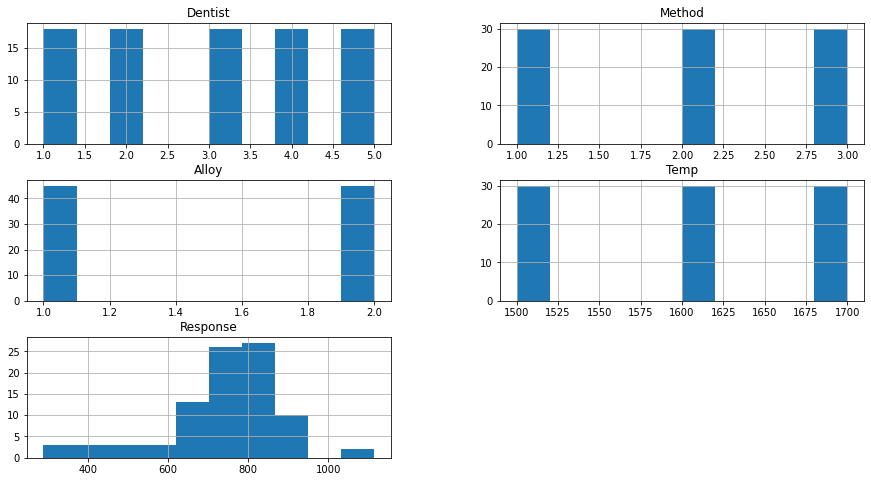

In [157]:
#Checking normality of distribution. 
d3.hist(figsize=(15,8))
plt.show()

In [158]:
#checking outliers

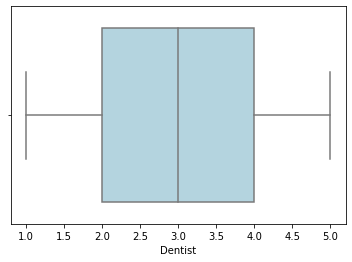

In [159]:
sns.boxplot(x= d3['Dentist'], color='lightblue')
plt.show()

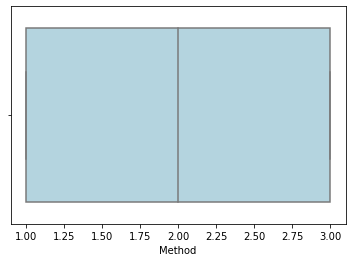

In [160]:
sns.boxplot(x= d3['Method'], color='lightblue')
plt.show()

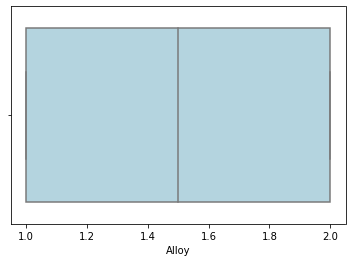

In [161]:
sns.boxplot(x= d3['Alloy'], color='lightblue')
plt.show()

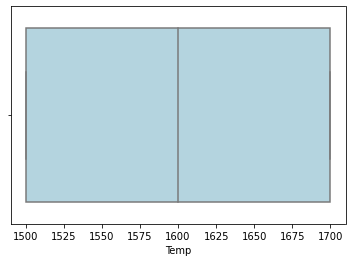

In [162]:
sns.boxplot(x= d3['Temp'], color='lightblue')
plt.show()

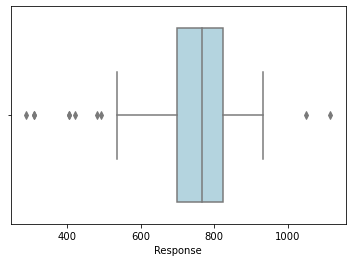

In [163]:
sns.boxplot(x=d3['Response'], color='lightblue')
plt.show()

In [164]:
#removing outliers. 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [165]:
lrincome,urincome=remove_outlier(d3['Response'])
d3['Response']=np.where(d3['Response']>urincome,urincome,d3['Response'])
d3['Response']=np.where(d3['Response']<lrincome,lrincome,d3['Response'])

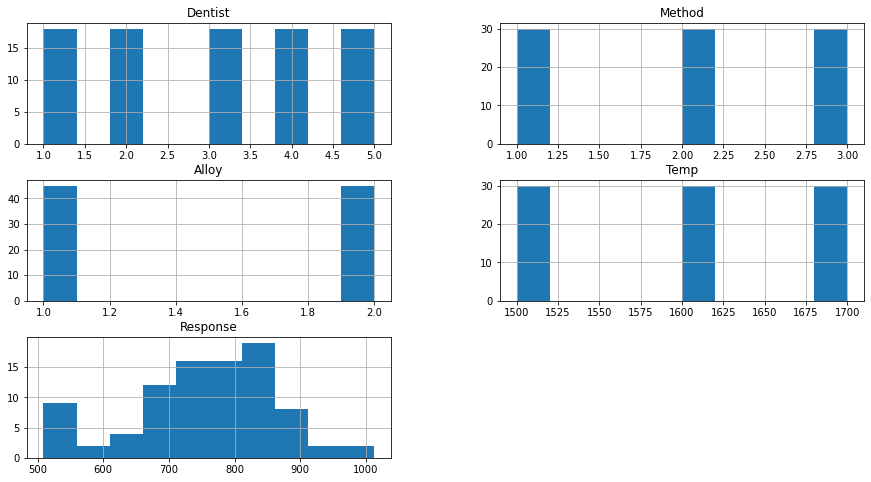

In [166]:
d3.hist(figsize=(15,8))
plt.show()

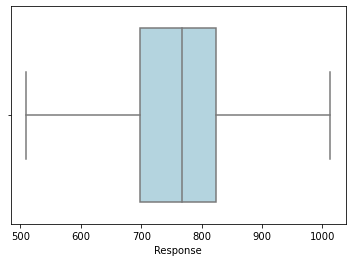

In [167]:
#outliers removed
sns.boxplot(x= d3['Response'], color='lightblue')
plt.show()

In [168]:
#changing numerical variables to categorical variables
d3['Dentist']= pd.Categorical(d3['Dentist'])
d3['Method']= pd.Categorical(d3['Method'])
d3['Alloy']= pd.Categorical(d3['Alloy'])
d3['Temp']=pd.Categorical(d3['Temp'])

In [169]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     float64 
dtypes: category(4), float64(1)
memory usage: 1.8 KB


In [194]:
#forming subcategories
Dentist_1 = d3[d3['Dentist']==1]['Response']
Dentist_2 = d3[d3['Dentist']==2]['Response']
Dentist_3 = d3[d3['Dentist']==3]['Response']
Dentist_4 = d3[d3['Dentist']==4]['Response']
Dentist_5 = d3[d3['Dentist']==5]['Response']

Method_1 = d3[d3['Method']==1]['Response']
Method_2 = d3[d3['Method']==2]['Response']
Method_3 = d3[d3['Method']==3]['Response']

Alloy_1 = d3[d3['Alloy']==1]['Response']
Alloy_2 = d3[d3['Alloy']==2]['Response']
Alloy_3 = d3[d3['Alloy']==3]['Response']

Temp_1 = d3[d3['Temp']==1500]['Response']
Temp_2 = d3[d3['Temp']==1600]['Response']
Temp_3 = d3[d3['Temp']==1700]['Response']

In [171]:
#checking value counts of each group
print(len(Dentist_1))
print(len(Dentist_2))
print(len(Dentist_3))
print(len(Dentist_4))
print(len(Dentist_5))

18
18
18
18
18


In [172]:
print(len(Method_1))
print(len(Method_2))
print(len(Method_3))

30
30
30


In [173]:
print(len(Alloy_1))
print(len(Alloy_2))

45
45


In [174]:
print(len(Temp_1))
print(len(Temp_2))
print(len(Temp_3))

30
30
30


In [175]:
#checking normalcy

In [176]:
from scipy import stats
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05
print(stats.shapiro([Dentist_1]))
print(stats.shapiro([Dentist_2]))
print(stats.shapiro([Dentist_3]))

print('\n')
print(stats.shapiro([Method_1]))
print(stats.shapiro([Method_2]))
print(stats.shapiro([Method_3]))

print('\n')
print(stats.shapiro([Alloy_1]))
print(stats.shapiro([Alloy_2]))

print('\n')
print(stats.shapiro([Temp_1]))
print(stats.shapiro([Temp_2]))
print(stats.shapiro([Temp_3]))

ShapiroResult(statistic=0.9512528777122498, pvalue=0.44500911235809326)
ShapiroResult(statistic=0.9665580987930298, pvalue=0.731051504611969)
ShapiroResult(statistic=0.9573882818222046, pvalue=0.5520997643470764)


ShapiroResult(statistic=0.9796932339668274, pvalue=0.8173373937606812)
ShapiroResult(statistic=0.9809848666191101, pvalue=0.8510975241661072)
ShapiroResult(statistic=0.8871709704399109, pvalue=0.004136798437684774)


ShapiroResult(statistic=0.8991953134536743, pvalue=0.000894434517249465)
ShapiroResult(statistic=0.927866518497467, pvalue=0.007890536449849606)


ShapiroResult(statistic=0.9331822395324707, pvalue=0.0596865713596344)
ShapiroResult(statistic=0.9791679382324219, pvalue=0.8030202984809875)
ShapiroResult(statistic=0.9185514450073242, pvalue=0.02460181713104248)


In [177]:
#Anderson Darling Test if Shapiro fails
print(stats.anderson(Dentist_1,dist='norm'))
print(stats.anderson(Dentist_2,dist='norm'))
print(stats.anderson(Dentist_3,dist='norm'))

print(stats.anderson(Method_1,dist='norm'))
print(stats.anderson(Method_2,dist='norm'))

print(stats.anderson(Temp_2,dist='norm'))

AndersonResult(statistic=0.4799398656918825, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.18489207423293763, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.31139490001785575, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.2445499504870412, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.29115203487535624, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.25772274137976225, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [178]:
#checking Homogeniety
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
#alpha = 0.05
print(stats.levene(Dentist_1,Dentist_2,Dentist_3))
print(stats.levene(Method_1,Method_2,Method_3))
print(stats.levene(Alloy_1,Alloy_2))
print(stats.levene(Temp_1,Temp_2,Temp_3))


LeveneResult(statistic=1.3736027902703822, pvalue=0.26240029040554935)
LeveneResult(statistic=3.5342167607107005, pvalue=0.03344085077476839)
LeveneResult(statistic=2.02655886945465, pvalue=0.15810620474519305)
LeveneResult(statistic=0.11898237456285736, pvalue=0.887967666035956)


In three variables pvalue is more than alpha, so fail to reject H0, and variances are equal